# Stage 09 — Homework Starter Notebook

In the lecture, we learned how to create engineered features. Now it’s your turn to apply those ideas to your own project data.

In [1]:
import pandas as pd
import numpy as np

# Example synthetic data (replace with your project dataset)
np.random.seed(0)
n = 100
df = pd.DataFrame({
    'income': np.random.normal(60000, 15000, n).astype(int),
    'monthly_spend': np.random.normal(2000, 600, n).astype(int),
    'credit_score': np.random.normal(680, 50, n).astype(int)
})
df.head()


,income,monthly_spend,credit_score
0,86460,3129,661
1,66002,1191,668
2,74681,1237,734
3,93613,2581,712
4,88013,1296,712


## TODO: Implement at least 2 engineered features here

In [ ]:
# Feature 1: Credit utilization adjusted by credit score
df['credit_util_score'] = (df['monthly_spend'] / df['credit_score'])
df


,income,monthly_spend,credit_score,credit_util_score
0,86460,3129,661,4.733737
1,66002,1191,668,1.782934
2,74681,1237,734,1.685286
3,93613,2581,712,3.625000
4,88013,1296,712,1.820225
...,...,...,...,...
95,70598,1897,736,2.577446
96,60157,2463,684,3.600877
97,86788,2494,709,3.517630
98,61903,3297,660,4.995455


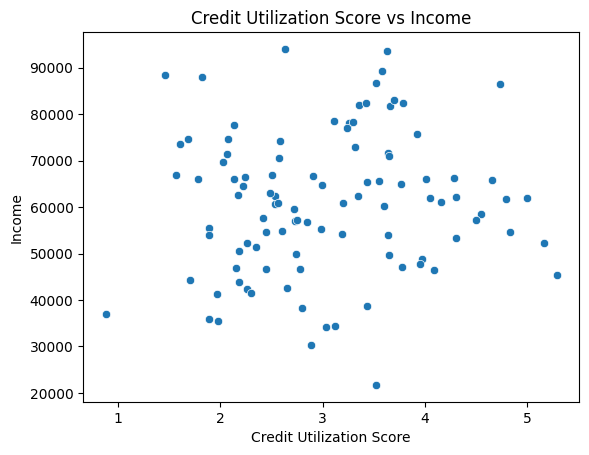

In [ ]:
# Optional: Plot or test correlation with target variable (here, target_variable is income)

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='credit_util_score', y='income')
plt.title('Credit Utilization Score vs Income')
plt.xlabel('Credit Utilization Score')
plt.ylabel('Income')
plt.show()


### Rationale for Feature 1
- excellent for assessing risk and financial behavior in context (relative spend vs. credit score)
- helps flag customers with high spend relative to their creditworthiness. If monthly spend is high and credit score is low, the resulting ratio will be large, signaling increased potential risk or overextension.
- segment customers into groups (e.g., low, medium, high risk) for proactive credit monitoring or targeted marketing, based on quantiles or thresholds of `credit_util_score`.

In [ ]:
# Feature 2: Rolling average of monthly spend over last 3 periods (assuming time-ordered data)
df['rolling_spend_mean_3'] = df['monthly_spend'].rolling(window=3, min_periods=1).mean()
df


,income,monthly_spend,credit_score,credit_util_score,rolling_spend_mean_3
0,86460,3129,661,4.733737,3129.000000
1,66002,1191,668,1.782934,2160.000000
2,74681,1237,734,1.685286,1852.333333
3,93613,2581,712,3.625000,1669.666667
4,88013,1296,712,1.820225,1704.666667
...,...,...,...,...,...
95,70598,1897,736,2.577446,1836.333333
96,60157,2463,684,3.600877,2224.333333
97,86788,2494,709,3.517630,2284.666667
98,61903,3297,660,4.995455,2751.333333


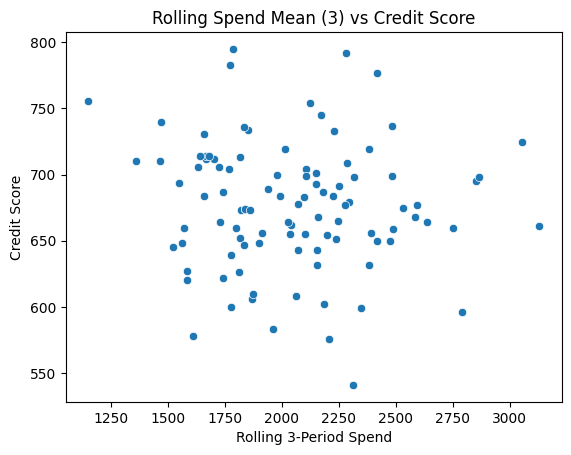

In [6]:
# Optional: Plot or test correlation with target variable (here, target_variable is credit_score)
sns.scatterplot(data=df, x='rolling_spend_mean_3', y='credit_score')
plt.title('Rolling Spend Mean (3) vs Credit Score')
plt.xlabel('Rolling 3-Period Spend')
plt.ylabel('Credit Score')
plt.show()


### Rationale for Feature 2
- smoothing monthly spend, you can detect if a customer’s spending is trending up or down—valuable for understanding changing behavior or anticipating future risk.
- rolling averages help reduce noise from one-off spikes. When used in a model, they stabilize predictions and reduce overreaction to extreme monthly values.
- sudden surge in the rolling mean can trigger alerts to review a customer’s recent financial activities.